## Восканян Юрий. КИ22-17/1б. Практическая работа №4
## Тема: Восстановлени регрессии

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from missingno import matrix
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, \
    Lars, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, StandardScaler

In [106]:
df = pd.read_csv('train.csv', index_col='id')
id_column = df.index

### Предварительная обработка данных

In [88]:
df.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


<Axes: >

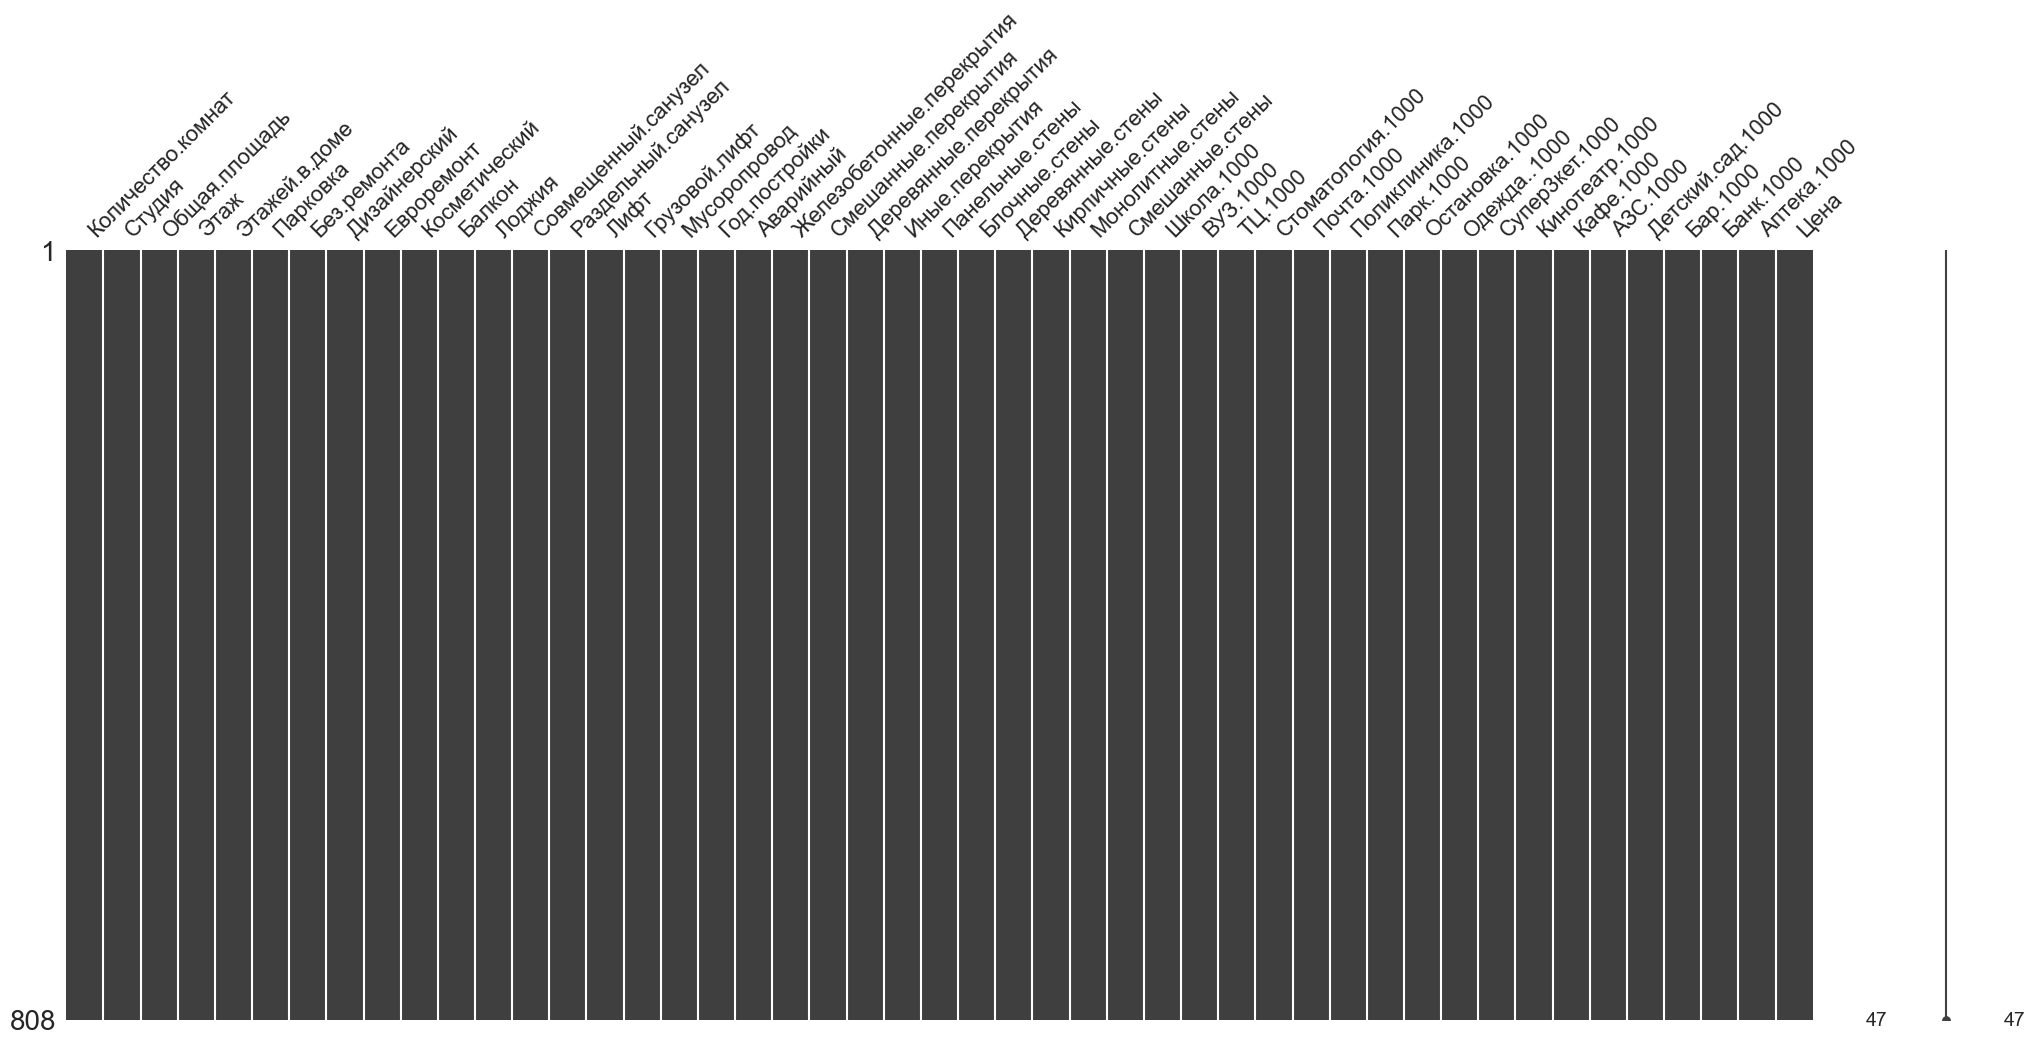

In [89]:
matrix(df)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 896 to 458
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  
 1

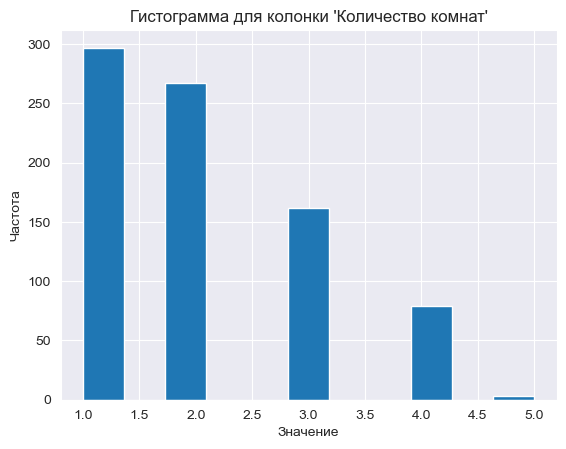

In [91]:
# Определение количества столбцов по правилу Стёрджеса
bins = round(np.log2(len(df))) + 1
df['Количество.комнат'].hist(bins=bins)
plt.title('Гистограмма для колонки \'Количество комнат\'')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

C:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


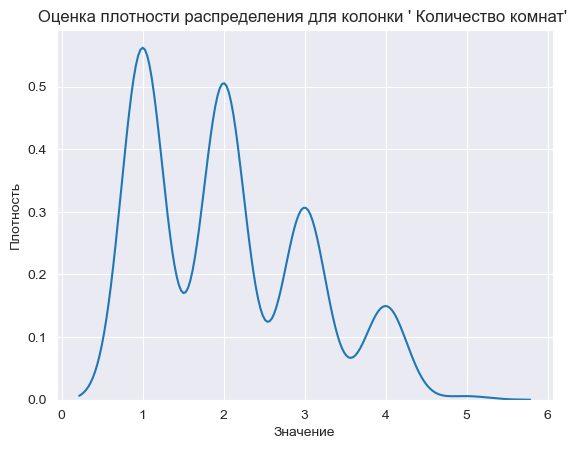

In [92]:
# Оценка плотности распределения
sns.kdeplot(df['Количество.комнат'])
plt.title('Оценка плотности распределения для колонки \' Количество комнат\' ')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()


In [107]:
# Применение standart scaler к числовым переменным
prices = df['Цена']
df.drop(columns=['Цена'], inplace=True)
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=df.columns)
df.index = id_column
df['Цена'] = prices


In [108]:
df

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
id,,,,,,,,,,,,,,,,,,,,,
896,-0.039783,-0.206351,-0.241288,-0.504138,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,-0.514603,-0.379971,-0.087812,0.305051,-0.034901,-0.361191,0.035673,0.561748,2350000.0
399,-0.039783,-0.206351,-0.311941,0.027989,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.479121,0.100030,-0.379971,-0.087812,0.305051,-0.299690,-0.529207,-0.401052,-0.306352,1799000.0
1515,-0.039783,-0.206351,0.111976,-1.036265,0.013544,-0.407364,2.975510,-0.159313,-0.336077,-1.841549,...,-0.414134,1.943928,-0.379971,-0.310582,0.305051,0.494677,-0.193176,0.035673,0.189705,2800000.0
1216,-0.039783,-0.206351,0.667104,-0.238074,-0.828280,-0.407364,-0.336077,-0.159313,2.975510,-1.841549,...,1.340526,0.100030,2.266721,5.258657,-0.306565,-0.432085,4.007208,3.675047,0.437734,3970000.0
677,-1.044311,-0.206351,-0.882209,-1.036265,0.224000,-0.407364,-0.336077,6.276942,-0.336077,-1.841549,...,-0.609096,-0.514603,-0.379971,-0.644736,0.305051,-0.564479,-0.697222,-0.546627,-0.926424,1880000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-1.044311,-0.206351,-0.645018,0.294053,0.013544,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,-1.436552,-0.379971,-0.644736,-1.529797,-0.696874,-0.697222,-0.546627,-1.050438,1700000.0
562,0.964744,-0.206351,-0.241288,-0.238074,-1.038737,2.454809,-0.336077,-0.159313,-0.336077,0.543021,...,2.250349,1.021979,2.266721,1.248805,0.305051,-0.034901,-0.025161,0.472398,0.437734,2400000.0
407,-1.044311,-0.206351,-0.846883,1.092244,1.486737,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.674083,-1.436552,-0.379971,-0.867505,-0.918181,-1.094057,-0.529207,-0.983352,-1.298467,1950000.0


<Axes: >

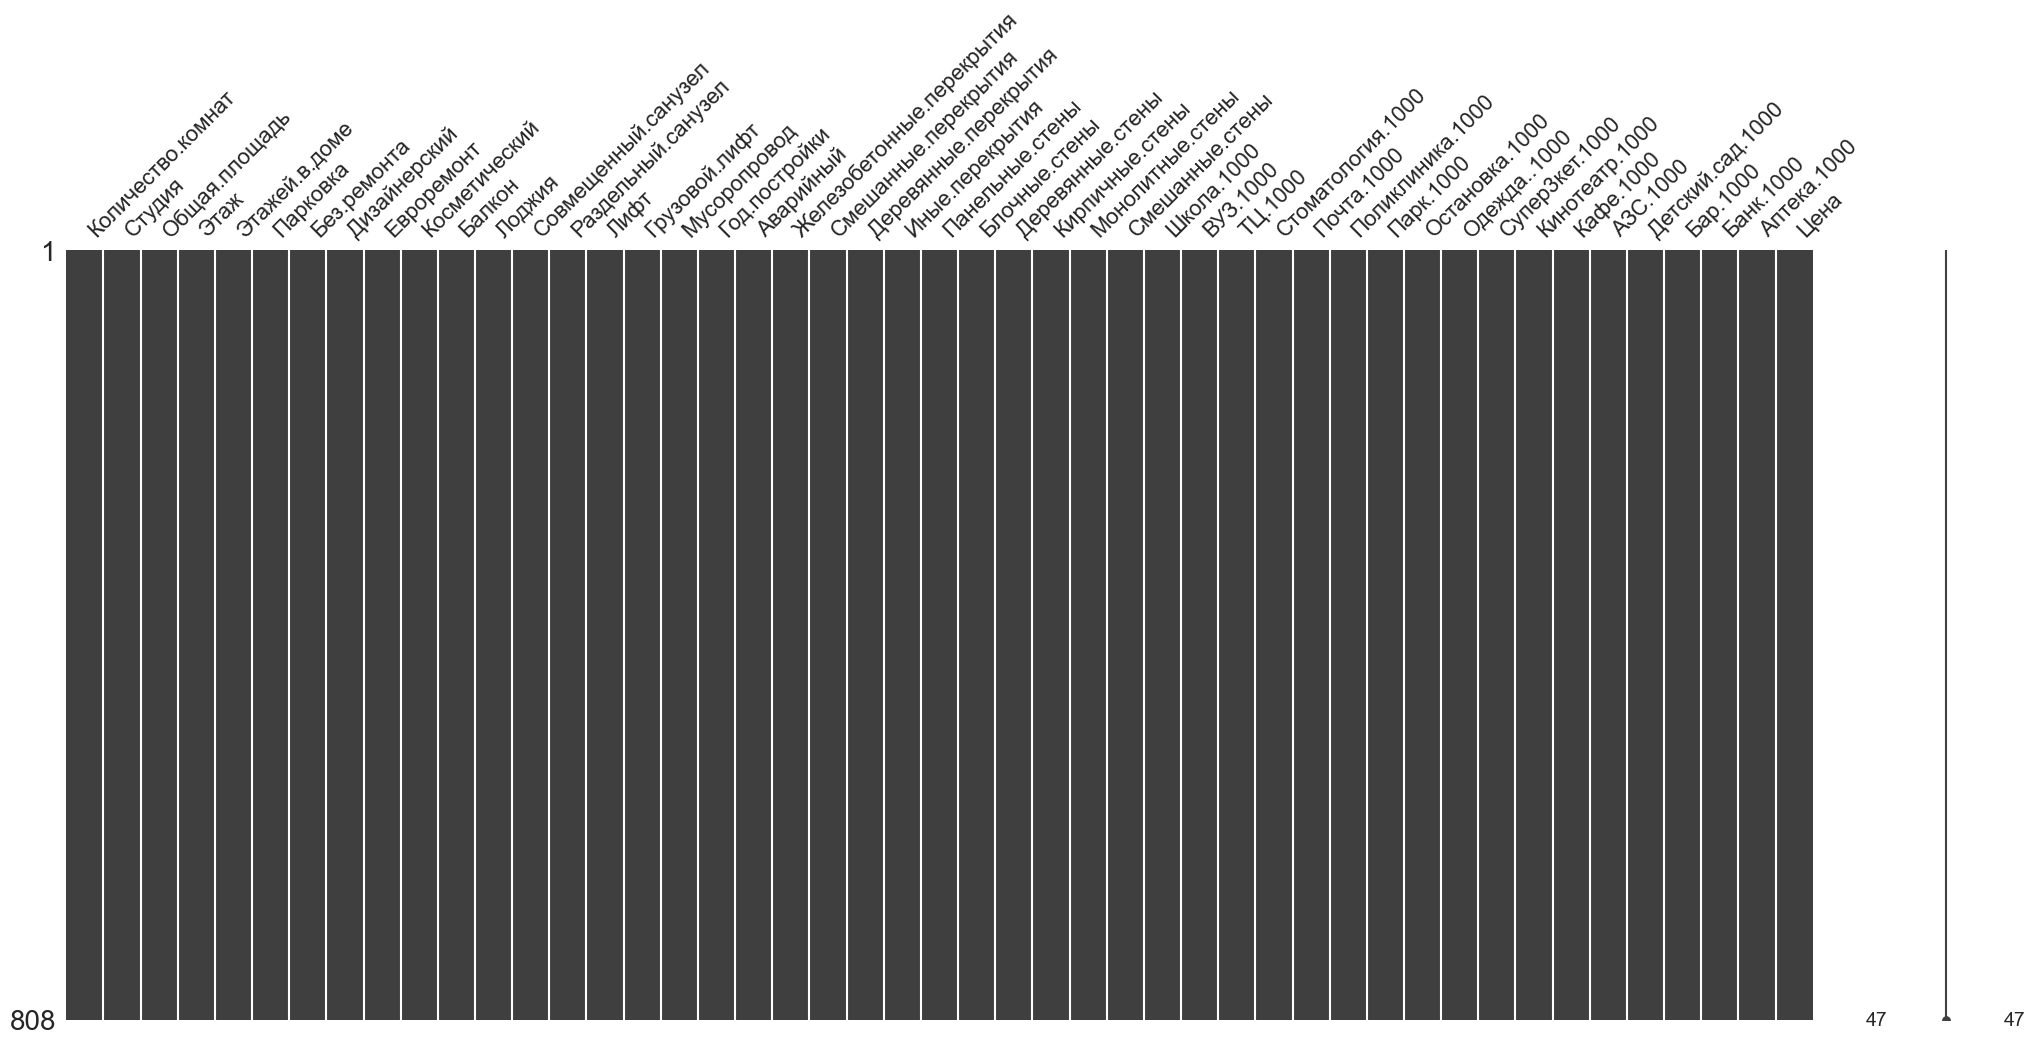

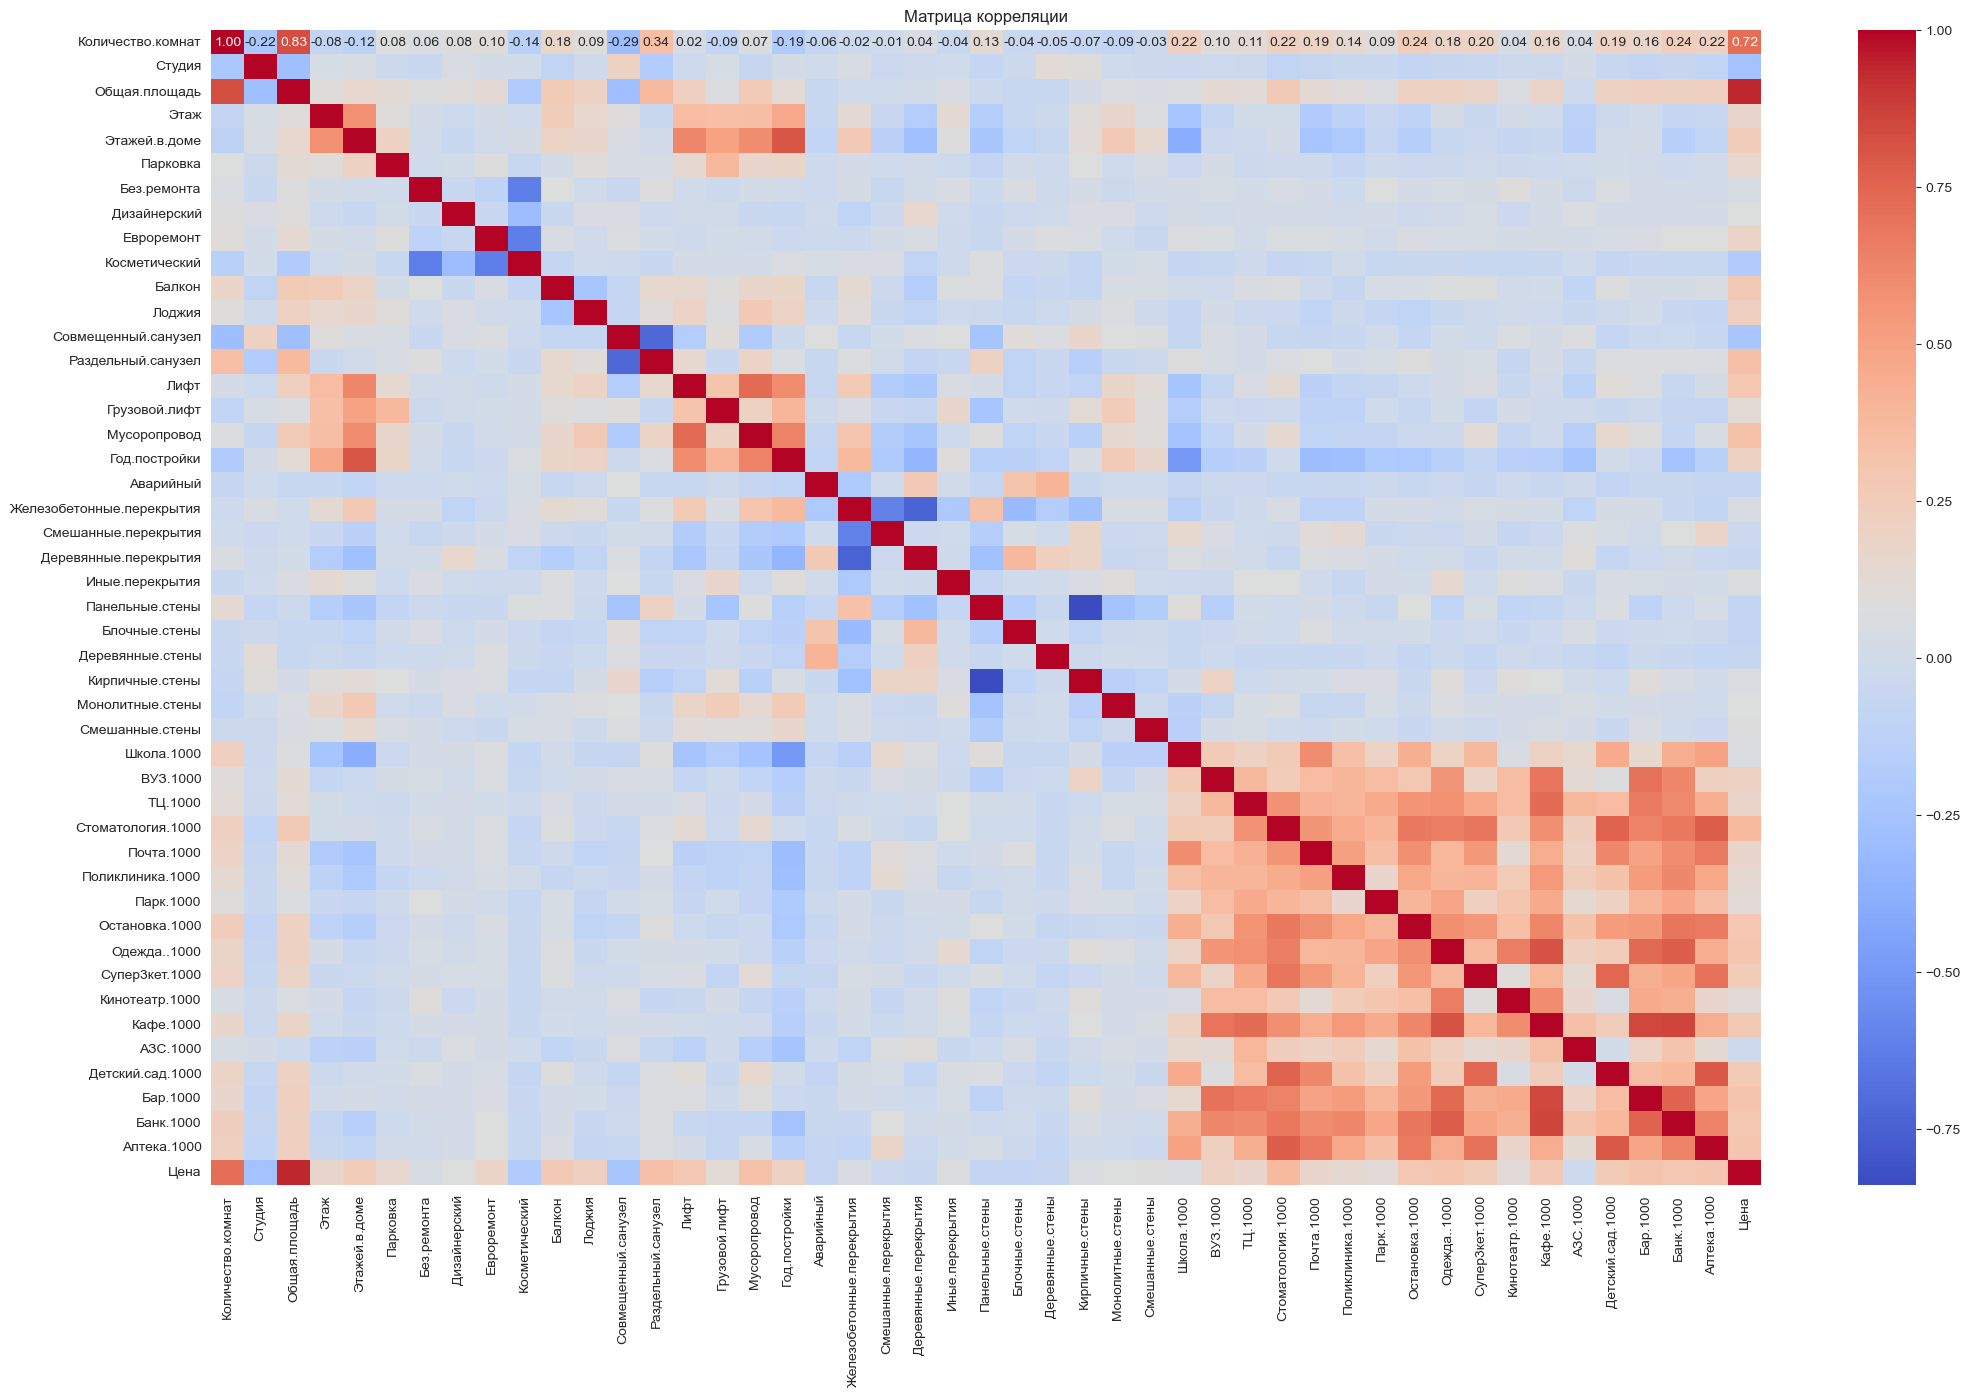

In [57]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [58]:
# weak_correlation = ['Студия', 'Косметический', 'Совмещенный.санузел']
# strong_correlation = [
#     'Общая.площадь',
#     'Количество.комнат',
#     ...
# ]
# df.drop(columns=weak_correlation, inplace=True)
# df.head(15)

In [59]:
# Создание вспомогательных классов

class GLMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, family=None, alpha=0.1, tol=1e-4):
        self.family = family
        self.alpha = alpha
        self.tol = tol

    def fit(self, X, y):
        self.model = sm.GLM(y, X, family=self.family)
        self.result = self.model.fit(alpha=self.alpha, tol=self.tol)
        return self

    def predict(self, X):
        return self.result.predict(X)


glm_wrapper = GLMWrapper(family=sm.families.Gaussian())


class OLSWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model = self.model_class(y, X)
        self.result = self.model.fit()
        return self
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.result.predict(X)
ols_wrapper = OLSWrapper(sm.OLS)
class NonparametricRegressionWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, kernel='rbf', alpha=1.0, gamma=None):
        self.kernel = kernel
        self.alpha = alpha
        self.gamma = gamma
    
    def fit(self, X, y):
        self.model = KernelRidge(kernel=self.kernel, alpha=self.alpha, gamma=self.gamma)
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
nonparametric_regression_wrapper = NonparametricRegressionWrapper()
        


In [60]:
regression_models = {
    'linear regression': (
        LinearRegression(),
        {'fit_intercept': [True, False],
         'positive': [True, False]
         }
    ),
    'Lasso regression': (
        Lasso(),
        {'copy_X': [False]}
    ),
    'Ridge regression': (
        Ridge(),
        {'positive': [True]}
    ),
    'ElasticNet regression': (
        ElasticNet(),
        {'positive': [True]}
    ),
    'Least-angle regression': (
        Lars(),
        {'fit_intercept': [False]}
    ),
    'Bayesian Ridge regression': (
        BayesianRidge(),
        {}
    ),
    'Generalized Linear Regression': (
        glm_wrapper,
        {"alpha": [0.1, 0.5, 1.0], "tol": [1e-4, 1e-5, 1e-6]}
    ),
    'Weighted OLS': (
        ols_wrapper,
        {'fit_intercept': [True, False]}
    ),
    'Polynomial regression': (
        Pipeline([('poly_features', PolynomialFeatures()), 
                   ('linear_regression', LinearRegression())]),
        {}
    ),
    'Splines': (
        Pipeline([('spline_features', SplineTransformer()), ('linear_regression', LinearRegression())]),
        {    'spline_features__degree': [2, 3, 4],  
            'spline_features__n_knots': [10, 20, 30],
        }
    ),
    'Nonparametric Regression': (
        nonparametric_regression_wrapper,
        {'kernel': ['linear', 'rbf'],  
        'alpha': [0.1, 1.0, 10.0],  
        'gamma': [0.1, 1.0, 10.0] }
    )
}

In [61]:

y = df['Цена']
X = df.drop('Цена', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [62]:
for model_name, (model, param_grid) in regression_models.items():
    print('-' * 90)
    print(model_name)

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_score = cross_val_score(model, X_train, y_train, cv=kfold,
                                 scoring='neg_root_mean_squared_error').mean()
    r2_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2').mean()
    num_features = X_train.shape[1]
    n = len(y_train)
    adjusted_r2 = 1 - (1 - r2_score) * ((n - 1) / (n - num_features - 1))

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    predictor = grid_search.fit(X_train, y_train)
    print(f"Средняя оценка RMSE на кросс-валидации для {model_name}:", np.abs(rmse_score))
    print(f"Средняя оценка R^2 на кросс-валидации для {model_name}:", r2_score)
    print(f"Средняя оценка adj R^2 на кросс-валидации для {model_name}:", adjusted_r2)
    print(f"Наилучшие параметры для {model_name}:", predictor.best_params_)


------------------------------------------------------------------------------------------
linear regression
Средняя оценка RMSE на кросс-валидации для linear regression: 163332182553.35574
Средняя оценка R^2 на кросс-валидации для linear regression: -1.0673488971291375e+23
Средняя оценка adj R^2 на кросс-валидации для linear regression: -1.1621327760247752e+23
Наилучшие параметры для linear regression: {'fit_intercept': True, 'positive': True}
------------------------------------------------------------------------------------------
Lasso regression
Средняя оценка RMSE на кросс-валидации для Lasso regression: 1.032235024998942
Средняя оценка R^2 на кросс-валидации для Lasso regression: -0.025624053079308328
Средняя оценка adj R^2 на кросс-валидации для Lasso regression: -0.11670263694349403
Наилучшие параметры для Lasso regression: {'copy_X': False}
------------------------------------------------------------------------------------------
Ridge regression
Средняя оценка RMSE на кросс-

C:\Users\yurav\.conda\envs\datescience\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yurav\.conda\envs\datescience\lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "C:\Users\yurav\.conda\envs\datescience\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\yurav\.conda\envs\datescience\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\yurav\.conda\envs\datescience\lib\site-packages\sklearn\utils\_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "C:\Users\yurav\AppData\Local\Temp\ipykernel_14808\1479193884.py", line 34, in predict
    return self.result.predic

Средняя оценка RMSE на кросс-валидации для Weighted OLS: nan
Средняя оценка R^2 на кросс-валидации для Weighted OLS: nan
Средняя оценка adj R^2 на кросс-валидации для Weighted OLS: nan
Наилучшие параметры для Weighted OLS: {'fit_intercept': False}
------------------------------------------------------------------------------------------
Polynomial regression
Средняя оценка RMSE на кросс-валидации для Polynomial regression: 25082259.709019456
Средняя оценка R^2 на кросс-валидации для Polynomial regression: -1217569148714020.5
Средняя оценка adj R^2 на кросс-валидации для Polynomial regression: -1325693049951173.0
Наилучшие параметры для Polynomial regression: {}
------------------------------------------------------------------------------------------
Splines
Средняя оценка RMSE на кросс-валидации для Splines: 13432296214.889486
Средняя оценка R^2 на кросс-валидации для Splines: -5.980207438458669e+20
Средняя оценка adj R^2 на кросс-валидации для Splines: -6.511268330677006e+20
Наилучши

### Лучше всех себя показал Ridge regression с параметрами {'positive': [True]}. Будем использовать его

In [110]:
test_data = pd.read_csv('test.csv', index_col='id')
id_column = test_data.index
test_data

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
id,,,,,,,,,,,,,,,,,,,,,
747,1,0,39.0,4,16,0,0,0,0,1,...,7,0,2,0,1,1,2,1,0,5
962,1,0,34.8,1,2,0,0,0,0,1,...,2,0,2,0,0,3,3,1,1,1
1105,1,0,37.7,2,17,0,0,0,0,1,...,5,2,9,0,9,3,17,4,2,13
795,4,0,83.5,10,10,0,0,0,0,1,...,13,47,5,1,19,2,11,2,13,20
390,1,0,42.0,10,10,0,0,0,0,1,...,20,8,8,0,7,2,18,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2,0,48.0,5,5,0,0,0,0,1,...,9,4,3,0,5,1,11,0,9,12
67,4,0,84.0,10,10,0,0,0,1,0,...,28,43,8,0,32,5,19,18,38,32
754,1,0,36.0,8,10,0,0,0,0,1,...,11,2,10,0,6,3,14,1,2,15


In [111]:
# matrix(test_data)
test_data.head(15)

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
id,,,,,,,,,,,,,,,,,,,,,
747,1,0,39.0,4,16,0,0,0,0,1,...,7,0,2,0,1,1,2,1,0,5
962,1,0,34.8,1,2,0,0,0,0,1,...,2,0,2,0,0,3,3,1,1,1
1105,1,0,37.7,2,17,0,0,0,0,1,...,5,2,9,0,9,3,17,4,2,13
795,4,0,83.5,10,10,0,0,0,0,1,...,13,47,5,1,19,2,11,2,13,20
390,1,0,42.0,10,10,0,0,0,0,1,...,20,8,8,0,7,2,18,6,6,17
1302,1,0,32.0,1,2,0,0,0,0,1,...,11,14,0,0,7,6,9,4,2,3
1448,1,0,43.0,8,10,0,0,0,0,1,...,13,8,10,0,6,5,30,7,6,19
1388,3,0,63.0,3,9,0,0,0,0,1,...,6,3,4,0,3,1,9,1,3,7
126,1,0,18.0,5,5,0,0,0,0,1,...,13,4,8,0,3,2,14,5,4,18


In [112]:
scaled_test_data = standard_scaler.transform(test_data)
test_data = pd.DataFrame(scaled_test_data, columns=test_data.columns, index=test_data.index)
test_data.index = id_column

In [113]:
test_data.head(15)

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
id,,,,,,,,,,,,,,,,,,,,,
747,-1.044311,-0.206351,-0.594551,-0.238074,1.486737,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.439737,-0.674083,-0.821919,-0.379971,-0.756121,-0.918181,-1.491241,-0.529207,-0.983352,-1.050438
962,-1.044311,-0.206351,-0.806510,-1.036265,-1.459649,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-1.405771,-0.674083,-0.821919,-0.379971,-0.867505,0.305051,-1.358846,-0.529207,-0.837777,-1.546495
1105,-1.044311,-0.206351,-0.660158,-0.770202,1.697194,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.826150,-0.544108,1.329295,-0.379971,0.134958,0.305051,0.494677,-0.025161,-0.692202,-0.058324
795,1.969272,-0.206351,1.651196,1.358308,0.224000,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,0.719504,2.380324,0.100030,2.266721,1.248805,-0.306565,-0.299690,-0.361191,0.909123,0.809777
390,-1.044311,-0.206351,-0.443153,1.358308,0.224000,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,2.071951,-0.154184,1.021979,-0.379971,-0.087812,-0.306565,0.627072,0.310870,-0.109902,0.437734
1302,-1.044311,-0.206351,-0.947815,-1.036265,-1.459649,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,0.333090,0.235740,-1.436552,-0.379971,-0.087812,2.139899,-0.564479,-0.025161,-0.692202,-1.298467
1448,-1.044311,-0.206351,-0.392687,0.826180,0.224000,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,0.719504,-0.154184,1.636612,-0.379971,-0.199197,1.528283,2.215806,0.478885,-0.109902,0.685762
1388,0.964744,-0.206351,0.616638,-0.504138,0.013544,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.632943,-0.479121,-0.207286,-0.379971,-0.533351,-0.918181,-0.564479,-0.529207,-0.546627,-0.802410
126,-1.044311,-0.206351,-1.654342,0.027989,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,0.719504,-0.414134,1.021979,-0.379971,-0.533351,-0.306565,0.097493,0.142855,-0.401052,0.561748


In [114]:
# Построение матрицы корреляции

# correlation_matrix = test_data.corr()
# plt.figure(figsize=(25, 15))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Матрица корреляции')
# plt.show()


In [115]:
main_model = Ridge()
params = {'positive': [True]}

# main_model = LinearRegression()
# params = {'fit_intercept': [True, False], 'positive': [True, False]}
estimator = GridSearchCV(estimator=main_model, cv=5, param_grid=params)
X = df.drop('Цена', axis=1)
y = df['Цена']
predictor = estimator.fit(X, y)
y_pred = predictor.best_estimator_.predict(test_data)
test_data['Цена'] = y_pred

In [116]:
test_data.head()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
id,,,,,,,,,,,,,,,,,,,,,
747,-1.044311,-0.206351,-0.594551,-0.238074,1.486737,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.674083,-0.821919,-0.379971,-0.756121,-0.918181,-1.491241,-0.529207,-0.983352,-1.050438,2.275250e+06
962,-1.044311,-0.206351,-0.806510,-1.036265,-1.459649,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.674083,-0.821919,-0.379971,-0.867505,0.305051,-1.358846,-0.529207,-0.837777,-1.546495,1.765626e+06
1105,-1.044311,-0.206351,-0.660158,-0.770202,1.697194,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,1.329295,-0.379971,0.134958,0.305051,0.494677,-0.025161,-0.692202,-0.058324,2.271328e+06
795,1.969272,-0.206351,1.651196,1.358308,0.224000,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,2.380324,0.100030,2.266721,1.248805,-0.306565,-0.299690,-0.361191,0.909123,0.809777,4.424935e+06
390,-1.044311,-0.206351,-0.443153,1.358308,0.224000,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.154184,1.021979,-0.379971,-0.087812,-0.306565,0.627072,0.310870,-0.109902,0.437734,2.615864e+06


In [117]:
dd = test_data['Цена']
dd

id
747     2.275250e+06
962     1.765626e+06
1105    2.271328e+06
795     4.424935e+06
390     2.615864e+06
            ...     
1060    2.340754e+06
67      5.011877e+06
754     2.040323e+06
1077    2.716976e+06
1253    2.272839e+06
Name: Цена, Length: 783, dtype: float64

In [118]:
dd.to_csv('result.csv')